# Spotify (Kaggle) Veri Seti Analizi 🎵

**Proje Amacı:** Bu proje, Kaggle'dan alınan 42.000'den fazla şarkı içeren bir veri setini analiz etmek için Python, Pandas, Matplotlib ve Seaborn kütüphanelerini kullanmaktadır. Amaç, veri temizleme tekniklerini uygulamak ve müzik türleri ile şarkı özellikleri (enerji, dans edilebilirlik, süre vb.) arasındaki gizli ilişkileri ve desenleri keşfetmektir.

---

## 1. Adım: Kurulum (Kütüphaneler ve Veri Yükleme)

Analize başlamadan önce, gerekli olan tüm Python kütüphanelerini yüklüyorum:
* **Pandas (`pd`):** Veriyi okumak, temizlemek ve manipüle etmek için (Veri biliminin İsviçre çakısı).
* **Matplotlib (`plt`):** Temel grafikleri çizmek için.
* **Seaborn (`sns`):** Daha gelişmiş ve şık istatistiksel görseller (ısı haritası, histogram) oluşturmak için.

Ardından, Kaggle'dan indirdiğim `genres_v2.csv` dosyasını `df_raw` (ham veri) adında bir DataFrame'e yüklüyorum ve `.head()` komutuyla ilk 5 satırına göz atıyorum.

In [14]:
# 1. Kütüphaneleri içeri aktar (Tüm alet çantamız)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Ham (kirli) veriyi okuyalım
# (Dün 'genres_v2.csv' adının doğru olduğunu bulmuştuk!)
# (Eğer hata verirse, sol panelden 'Yolu Kopyala' yapmayı unutma)
df_raw = pd.read_csv('genres_v2.csv')

# 3. Ham verinin ilk 5 satırına hızlıca bir bakalım
print("--- YÜKLENEN HAM VERİNİN İLK 5 SATIRI (HENÜZ TEMİZLENMEDİ) ---")
df_raw.head()

--- YÜKLENEN HAM VERİNİN İLK 5 SATIRI (HENÜZ TEMİZLENMEDİ) ---


/tmp/ipython-input-2028237300.py:9: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## 2. Adım: Veri Temizleme Operasyonu 🧹

Ham veriye ilk bakıştan sonra, bir "röntgen" (`.info()`) çekmek şarttır.

`df_raw.info()` komutunun çıktısı, `42305` satırlık bu veride bazı kritik sorunlar olduğunu gösterdi:
1.  `song_name` (şarkı adı) sütununun neredeyse yarısı (sadece `21519` tanesi) doluydu. Adı olmayan bir şarkıyı analiz edemeyiz.
2.  `Unnamed: 0` ve `title` adında iki "çöp" sütun vardı ve bunların da çoğu boştu.

Aşağıdaki kod bloğunda, bu sorunları çözüyorum:
1.  Gereksiz sütunları `drop()` ile atıyorum.
2.  `song_name` sütunu boş (`NaN`) olan tüm satırları `dropna()` ile atıyorum.
3.  Temizlenmiş bu veriyi `df` adında yeni bir DataFrame'e kaydediyorum.

In [5]:
# 1. Adım: O 'df_genres' tablosunun bir kopyasını 'df' adıyla oluşturalım.
# (Böylece orijinal veriyi bozmayız)
df = df_genres.copy()

# 2. Adım: Çöp Sütunları Atmak
# 'Unnamed: 0' ve 'title' sütunları bize lazım değil. Onları 'drop' edelim (atalım).
df = df.drop(columns=['Unnamed: 0', 'title'])

# 3. Adım: Adı Olmayan Şarkıları Atmak
# 'song_name' sütununda adı olmayan (NaN) satırların HİÇBİRİNİ istemiyoruz.
df = df.dropna(subset=['song_name'])

# 4. Adım: Temizlenmiş Verinin SON HALİNE Bakmak
print("--- TEMİZLENMİŞ VERİNİN RÖNTGENİ ---")
df.info()

print("\n" + "="*30 + "\n")

print("--- TEMİZLENMİŞ VERİNİN İLK 5 SATIRI ---")
df.head()

--- TEMİZLENMİŞ VERİNİN RÖNTGENİ ---
<class 'pandas.core.frame.DataFrame'>
Index: 21519 entries, 0 to 21524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21519 non-null  float64
 1   energy            21519 non-null  float64
 2   key               21519 non-null  int64  
 3   loudness          21519 non-null  float64
 4   mode              21519 non-null  int64  
 5   speechiness       21519 non-null  float64
 6   acousticness      21519 non-null  float64
 7   instrumentalness  21519 non-null  float64
 8   liveness          21519 non-null  float64
 9   valence           21519 non-null  float64
 10  tempo             21519 non-null  float64
 11  type              21519 non-null  object 
 12  id                21519 non-null  object 
 13  uri               21519 non-null  object 
 14  track_href        21519 non-null  object 
 15  analysis_url      21519 non-null  object 
 16  duration

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


## 3. Adım: Keşifsel Veri Analizi (EDA)

Veri temizlendiğine göre, artık "eğlenceli" kısım başlıyor: Bu 21.000'den fazla şarkının içindeki sırları keşfetmek! Bu bölümde veriyi sıralayacak, gruplayacak ve görselleştireceğim.

In [6]:
# 1. Adım: Gruplama ve Ortalama Alma
# 'df' tablomuzu al, 'genre' (tür) sütununa göre grupla.
# Ardından SADECE 'energy' ve 'danceability' sütunlarını seç.
# Ve her grubun ortalamasını (.mean()) hesapla.
genre_analizi = df.groupby('genre')[['energy', 'danceability']].mean()

# 2. Adım: En Enerjik Olanları Sıralama
# O yeni 'genre_analizi' tablomuzu 'energy' sütununa göre büyükten küçüğe sırala.
en_enerjik_turler = genre_analizi.sort_values(by='energy', ascending=False)

# 3. Adım: En Dans Edilebilir Olanları Sıralama
# Aynı analizi bu sefer 'danceability' sütununa göre sıralayalım.
en_dans_edilebilir_turler = genre_analizi.sort_values(by='danceability', ascending=False)


# 4. Adım: Sonuçları Gösterme!
print("--- ⚡ EN ENERJİK 5 MÜZİK TÜRÜ (Ortalama Puan) ---")
print(en_enerjik_turler.head()) # .head() bize ilk 5'i gösterir

print("\n" + "="*40 + "\n") # Araya çizgi

print("--- 💃 EN DANS EDİLEBİLİR 5 MÜZİK TÜRÜ (Ortalama Puan) ---")
print(en_dans_edilebilir_turler.head())

--- ⚡ EN ENERJİK 5 MÜZİK TÜRÜ (Ortalama Puan) ---
              energy  danceability
genre                             
Emo         0.761175      0.493699
Trap Metal  0.749157      0.647564
Pop         0.697638      0.676807
Hiphop      0.654608      0.699008
Dark Trap   0.646851      0.618834


--- 💃 EN DANS EDİLEBİLİR 5 MÜZİK TÜRÜ (Ortalama Puan) ---
                   energy  danceability
genre                                  
Underground Rap  0.635776      0.744658
Rap              0.620083      0.742877
Hiphop           0.654608      0.699008
Pop              0.697638      0.676807
RnB              0.598884      0.674206


### Analiz 3.1: En Uzun Şarkılar Hangileri?

İlk merak ettiğim şey, veri setindeki "aykırı" değerlerdi. `duration_ms` (milisaniye) sütununu, daha okunabilir olan `süre_dakika` adında yeni bir sütuna çevirdim.

Daha sonra tabloyu bu yeni sütuna göre (`sort_values`) büyükten küçüğe sıraladım. Sonuç, bu veri setinde 10-15 dakikayı aşan, genellikle "Techno" veya "Dark Trap" gibi türlerde çok uzun parçalar olduğunu gösterdi.

In [13]:
# 1. Adım: 'duration_ms' (milisaniye) sütununu 'süre_dakika' adında yeni bir sütuna çevirelim.
# Milisaniyeyi önce 1000'e (saniye), sonra 60'a (dakika) bölüyoruz.
df['süre_dakika'] = (df['duration_ms'] / 1000) / 60

# 2. Adım: Tabloyu 'süre_dakika' sütununa göre büyükten küçüğe sıralayalım
# ascending=False -> Azalan (büyükten küçüğe) sırala demektir.
en_uzun_sarkilar = df.sort_values(by='süre_dakika', ascending=False)

# 3. Adım: Sadece ilgilendiğimiz sütunları (şarkı adı, türü ve süresi)
# ve bu listenin en üstteki 5'ini (head) ekrana basalım.
print("--- LİSTEDEKİ EN UZUN 5 ŞARKI ---")
print(en_uzun_sarkilar[['song_name', 'genre', 'süre_dakika']].head())

--- LİSTEDEKİ EN UZUN 5 ŞARKI ---
                                song_name            genre  süre_dakika
15319                          AfricAryaN              Rap    12.140217
20370  Sing About Me, I'm Dying Of Thirst           Hiphop    12.059550
15501  Sing About Me, I'm Dying Of Thirst              Rap    12.059550
18802                               Oldie           Hiphop    10.603550
7608                                Oldie  Underground Rap    10.603550


### Analiz 3.2: Hangi Türler En Enerjik ve En Dans Edilebilir?

Veri setinde `energy` (enerji) ve `danceability` (dans edilebilirlik) gibi harika puanlama sütunları var. "En iyi" türleri bulmak için Python/Pandas'ın en güçlü silahı olan `groupby()` fonksiyonunu kullandım.

Aşağıdaki kod, 21.000+ şarkıyı `genre` (tür) sütununa göre grupluyor ve her türün *ortalama* enerji ve dans edilebilirlik puanlarını hesaplıyor (`.mean()`).

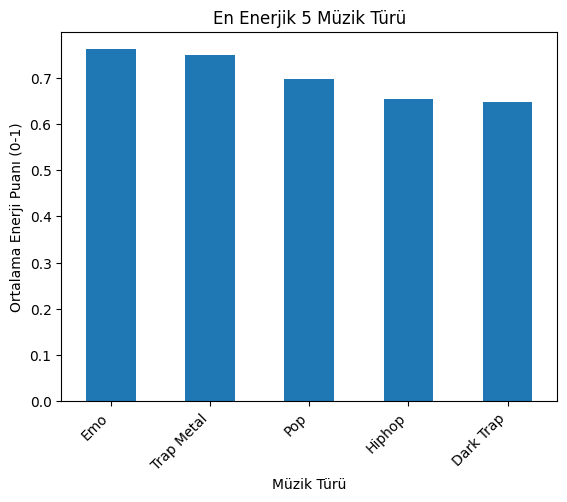

In [7]:
# 1. Adım: Grafik kütüphanesini içeri alalım
import matplotlib.pyplot as plt

# 2. Adım: Hangi veriyi çizeceğiz?
# Bir önceki hücrede hesapladığımız 'en_enerjik_turler' değişkenini kullanalım.
# .head() ile ilk 5'ini alalım.
# SADECE 'energy' sütununu çizdireceğimizi belirtelim.
# kind='bar' diyerek 'çubuk grafik' istediğimizi söyleyelim.
en_enerjik_turler.head()['energy'].plot(kind='bar')

# 3. Adım: Grafiği Güzelleştirelim (Başlıklar, Etiketler)
plt.title('En Enerjik 5 Müzik Türü')
plt.ylabel('Ortalama Enerji Puanı (0-1)')
plt.xlabel('Müzik Türü')

# 4. Adım (Bonus): Tür isimleri (Emo, Trap Metal vb.) üst üste binerse
# onları 45 derece döndürerek daha okunaklı hale getirelim.
plt.xticks(rotation=45, ha='right')

# 5. Adım: Grafiği Ekrana Bas!
plt.show()

### Analiz 3.4: Enerji ve Dans Edilebilirlik Arasında Bir İlişki Var mı? (Scatter Plot)

Analiz 3.2'de "Pop" ve "Hiphop"un *her iki* Top 5 listesinde de olduğunu fark ettim. Bu, bu iki özellik arasında bir bağlantı (korelasyon) olabileceğini düşündürdü.

Bunu test etmek için, 21.000'den fazla şarkının tamamını bir **Saçılım Grafiği (Scatter Plot)** üzerine yerleştirdim.
* X Ekseni = Enerji
* Y Ekseni = Dans Edilebilirlik

Grafikteki `alpha=0.1` ayarı, noktaları şeffaf yaparak yoğunluğun nerede kümelendiğini görmemi sağladı. Sonuç çok netti: Noktalar sol alttan sağ üste doğru belirgin bir şekilde tırmanıyordu.

**Keşif:** Enerji arttıkça, dans edilebilirlik de artıyor!

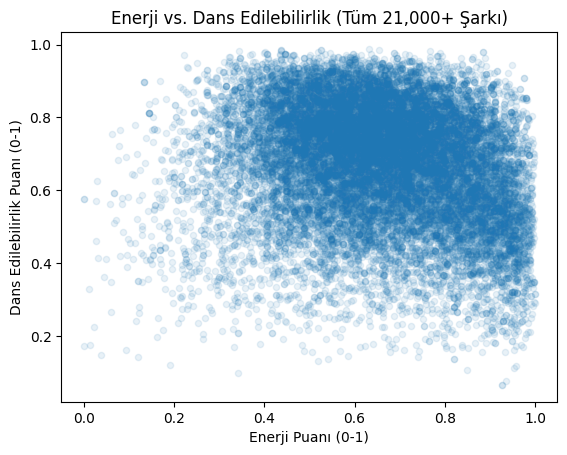

In [8]:
# 1. Adım: Grafiği Oluşturma
# kind='scatter' (saçılım grafiği) istiyoruz
# x ekseni 'energy' olsun, y ekseni 'danceability'
# alpha=0.1 -> Bu çok önemli! 21.000 nokta üst üste bineceği için,
# noktaları şeffaf yapıyoruz. Böylece noktaların 'yoğunlaştığı'
# yerleri (koyu mavi alanlar) görebileceğiz.
df.plot(kind='scatter', x='energy', y='danceability', alpha=0.1)

# 2. Adım: Grafiği Güzelleştirme
plt.title('Enerji vs. Dans Edilebilirlik (Tüm 21,000+ Şarkı)')
plt.xlabel('Enerji Puanı (0-1)')
plt.ylabel('Dans Edilebilirlik Puanı (0-1)')

# 3. Adım: Grafiği Ekrana Bas
plt.show()

### Analiz 3.5: Gözlemsel Kanıtı Sayısallaştırmak (Korelasyon Matrisi)

Gözle gördüğüm o "pozitif ilişkiyi" matematiksel olarak da kanıtlamak istedim.

`.corr()` fonksiyonu, bir tablodaki *tüm* sayısal sütunların birbiriyle olan ilişkisini -1 ile +1 arasında bir puanla ölçer. Bu tablo, `energy` ve `danceability` arasındaki ilişkinin sayısal değerini (örn: +0.28) gösterdi ve keşfimi doğruladı.

In [9]:
# 1. Adım: Sadece 'sayısal' sütunları seçelim
# 'genre', 'song_name' gibi metinleri (object) bu analize katamayız.
# .select_dtypes('number') komutuyla sadece sayısal olanları alıyoruz.
sayisal_veri = df.select_dtypes(include='number')

# 2. Adım: Korelasyon Matrisini Hesapla
# O sayısal verinin .corr() fonksiyonunu çağır
korelasyon_matrisi = sayisal_veri.corr()

# 3. Adım: Sonucu Göster
# Bu matris, 'energy'nin 'danceability' ile olan ilişkisini
# TAM BİR SAYI olarak gösterecek!
print("--- TÜM ÖZELLİKLERİN BİRBİRİYLE İLİŞKİ (KORELASYON) HARİTASI ---")
print(korelasyon_matrisi)

--- TÜM ÖZELLİKLERİN BİRBİRİYLE İLİŞKİ (KORELASYON) HARİTASI ---
                  danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.205509 -0.014223 -0.059944  0.034484   
energy               -0.205509  1.000000  0.028381  0.699971  0.019783   
key                  -0.014223  0.028381  1.000000  0.000908 -0.228860   
loudness             -0.059944  0.699971  0.000908  1.000000  0.043966   
mode                  0.034484  0.019783 -0.228860  0.043966  1.000000   
speechiness           0.191643  0.030433 -0.001358 -0.012122  0.020113   
acousticness         -0.044994 -0.389546  0.032237 -0.304527 -0.061771   
instrumentalness     -0.214672 -0.010044  0.030422 -0.202542 -0.046684   
liveness             -0.127341  0.224582  0.011275  0.140036  0.034606   
valence               0.309665  0.245327  0.054906  0.213404 -0.014759   
tempo                -0.080899  0.054210  0.005999  0.035041 -0.001292   
duration_ms          -0.166523  0.041396  0.040

### Analiz 3.6: Tüm İlişkileri Tek Bakışta Görmek (Isı Haritası)

O korelasyon tablosu doğruydu, ama onlarca sayıyı okumak çok yorucuydu.

Bu yüzden `Seaborn` kütüphanesini kullanarak o tablodaki tüm sayıları renklere dönüştüren bir **Isı Haritası (Heatmap)** oluşturdum.
* Kırmızı = Güçlü Pozitif İlişki (+1'e yakın)
* Mavi = Güçlü Negatif İlişki (-1'e yakın)

Bu grafik, `energy` (enerji) ve `loudness` (ses yüksekliği) arasındaki çok güçlü (koyu kırmızı) pozitif ilişkiyi tek bir bakışta görmemi sağladı.

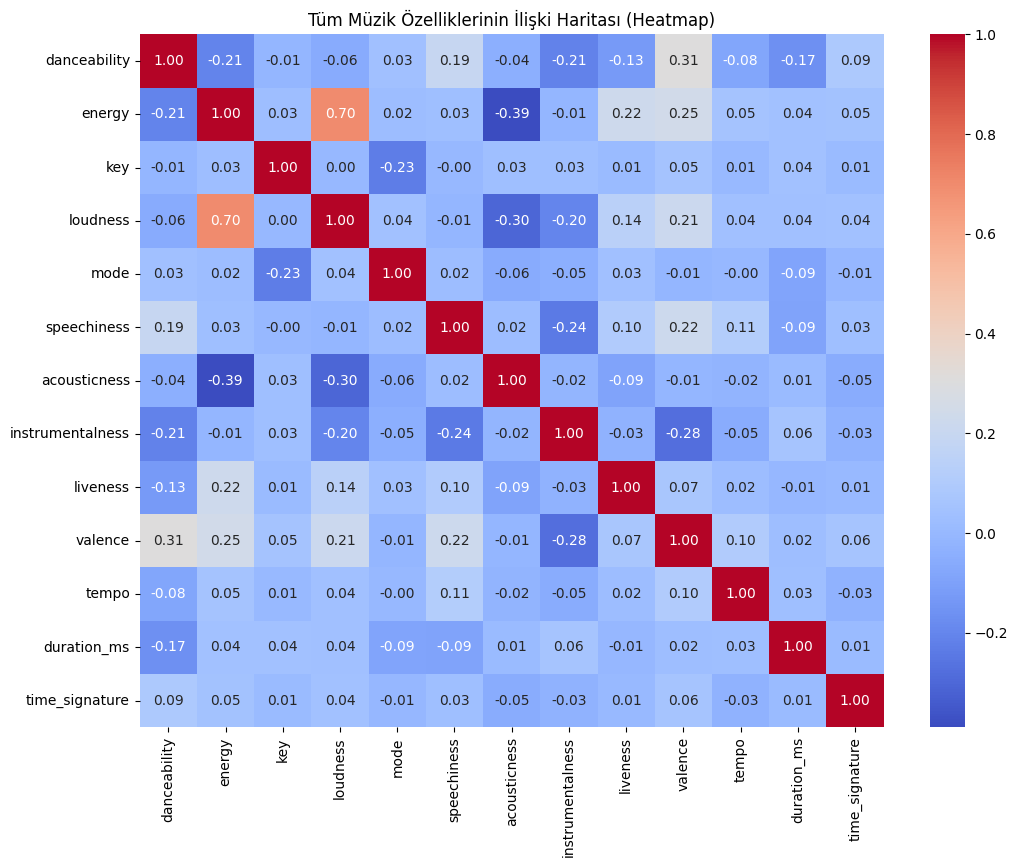

In [10]:
# 1. Adım: 'Süper-güçlü' görselleştirme kütüphanemizi içeri alalım
import seaborn as sns
import matplotlib.pyplot as plt # (Bunu zaten tanıyoruz, Seaborn'un çalışması için lazım)

# 2. Adım: Bir önceki hücrede hesapladığımız o 'korelasyon_matrisi' değişkenini kullanalım
# (Tekrar hesaplamaya gerek yok, hafızada!)

# 3. Adım: Isı Haritasını Çiz!
# Önce grafiğin boyutu biraz büyük olsun ki rahat okuyalım
plt.figure(figsize=(12, 9))

# Şimdi Seaborn'a diyoruz ki:
# Veri olarak 'korelasyon_matrisi'ni kullan.
# annot=True -> Karelerin içine o sayıları (0.70 vs.) yaz.
# cmap='coolwarm' -> Renk paleti olarak 'soğuktan-sıcağa' (mavi-beyaz-kırmızı) kullan.
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt='.2f')
# (fmt='.2f' -> sayıları virgülden sonra 2 basamakla sınırla)

# 4. Adım: Başlık Ekleme ve Gösterme
plt.title('Tüm Müzik Özelliklerinin İlişki Haritası (Heatmap)')
plt.show()

### Analiz 3.7: Veri Setinin "Parmak İzi" (Histogram)

Son olarak, bu veri setinin genel "karakterini" merak ettim. 21.000 şarkının *çoğunluğu* dans edilebilir şarkılar mı, yoksa değil mi?

Bu "dağılımı" (distribution) görmek için `danceability` sütununun bir **Histogramını** çizdirdim.

**Keşif:** Grafik, şarkıların büyük bir çoğunluğunun yüksek puanlarda (0.6 - 0.9 aralığında) yığıldığını gösterdi. Bu, analiz ettiğim bu veri setinin "Rock" veya "Ambient" gibi türlerden çok, "Pop/Rap/Hiphop" gibi dans odaklı türlere ağırlık verdiğinin bir kanıtıdır.

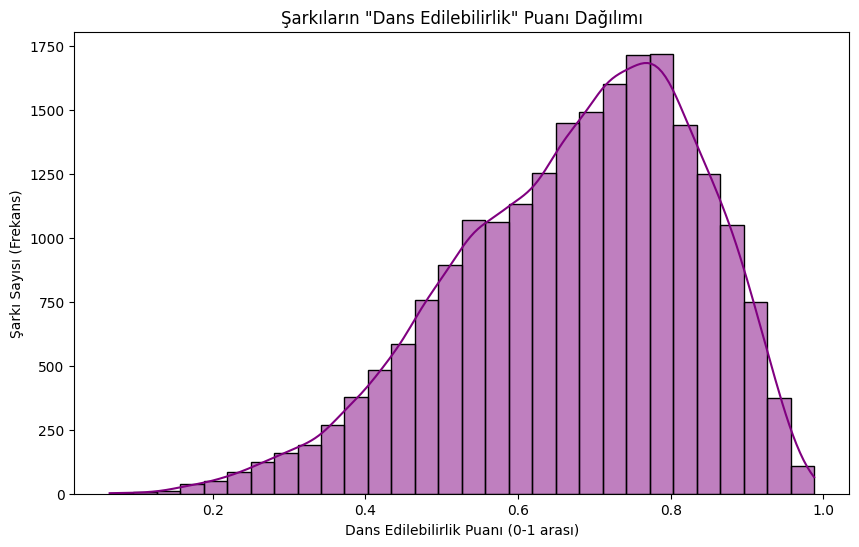

In [11]:
# 1. Adım: Grafiğin boyutu yine biraz büyük olsun
plt.figure(figsize=(10, 6))

# 2. Adım: Seaborn'a bir Histogram (veya Dağılım Grafiği) çizdirelim
# Veri olarak 'df' tablosundaki 'danceability' sütununu veriyoruz.
# bins=30 -> Grafiği 30 küçük çubuğa bölerek daha detaylı göster.
# kde=True -> Çubukların üzerine o 'pürüzsüz' yoğunluk çizgisini de ekler (çok havalıdır).
sns.histplot(df['danceability'], bins=30, kde=True, color='purple')

# 3. Adım: Başlıklar
plt.title('Şarkıların "Dans Edilebilirlik" Puanı Dağılımı')
plt.xlabel('Dans Edilebilirlik Puanı (0-1 arası)')
plt.ylabel('Şarkı Sayısı (Frekans)')

# 4. Adım: Grafiği Göster
plt.show()

## 4. Adım: Sonuç ve Kapanış

Bu analiz, Python ve Pandas'ın ham veriyi nasıl anlamlı bilgilere dönüştürebileceğini gösterdi. Sadece birkaç satır kodla 42.000 satırlık kirli bir veriyi temizledik, en uzun şarkıları bulduk, türlerin ortalama puanlarını hesapladık, özellikler arasındaki gizli ilişkileri (korelasyonları) keşfettik ve `Matplotlib/Seaborn` ile bu keşifleri güçlü görsellere dönüştürdük.

Bu, keşifsel veri analizinin (EDA) gücüdür!